In [1]:
from pomegranate import *
import numpy as np
from seaborn import heatmap
import json

In [2]:
d1 = DiscreteDistribution({'A': 0.25, 'B': 0.75})
d2 = ConditionalProbabilityTable([['A', 'A', 0.1],
                                      ['A', 'B', 0.9],
                                      ['B', 'A', 0.6],
                                      ['B', 'B', 0.4]], [d1])
d3 = ConditionalProbabilityTable([['A', 'A', 'A', 0.4],
                                      ['A', 'A', 'B', 0.6],
                                      ['A', 'B', 'A', 0.8],
                                      ['A', 'B', 'B', 0.2],
                                      ['B', 'A', 'A', 0.9],
                                      ['B', 'A', 'B', 0.1],
                                      ['B', 'B', 'A', 0.2],
                                      ['B', 'B', 'B', 0.8]], [d1, d2])
model = MarkovChain([d1, d2, d3])

In [3]:
# Is there a more straight forward way to get the table?
table = np.array(json.loads(model.distributions[1].to_json())['table'])

In [4]:
# Convert the table to a 2D matrix
def table_to_stm(table):
    elements, ixs = np.unique(table[:, 1], return_index=True)
    letters = elements[np.argsort(ixs)] # Account for the order in which they appear if the 
                                        # user specified them out of order for strange reasons
    
    ylabels = letters
    
    elements, ixs = np.unique(table[:, 0], return_index=True)
    xlabels = elements[np.argsort(ixs)]
    
    # Maybe I could just loop through the xlabels & ylabels and fill an array, 
    # would also account very for completely out of order tables.
    tm = np.vstack([table[table[:, 1] == np.array([letter], dtype=table[:, 1].dtype)][:, 2] for letter in letters])
    
    return tm, xlabels, ylabels

In [5]:
tm, xlabels, ylabels = table_to_stm(table)

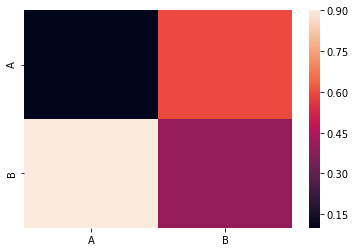

In [6]:
heatmap(tm.astype(np.float64), xticklabels=xlabels, yticklabels=ylabels)

In [7]:
from graphviz import Digraph

In [8]:
def draw_graph(table):
    f = Digraph('markov', filename='markov', format='pdf')
    
    letters = np.unique(table[:, 0])
        
    for state in letters:
        f.node(state)

    for row in table:
        f.edge(row[0], row[1], label=f'{float(row[2]):.2f}', penwidth=f'{2.5*float(row[2])}')
    
    
    f.view()

In [9]:
draw_graph(table)